## Data Science Capstone Project

# Healthcare.

### Problem Statement

-NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

-The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

-Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [1]:
# Importing Libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing Dataset
df=pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Performing descriptive analysis

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Since a value of 0 doesnt make sense in these 5 columns, Thus replacing these values with the Mean value

In [7]:
df['Glucose'].replace(0, df['Glucose'].mean(axis=0),inplace= True)

In [8]:
df['BloodPressure'].replace(0, df['BloodPressure'].mean(axis=0),inplace= True)

In [9]:
df['SkinThickness'].replace(0, df['SkinThickness'].mean(axis=0),inplace= True)

In [10]:
df['Insulin'].replace(0, df['Insulin'].mean(axis=0),inplace= True)

In [11]:
df['BMI'].replace(0, df['BMI'].mean(axis=0),inplace= True)

In [12]:
df['Glucose'].value_counts().head()

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
Name: Glucose, dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

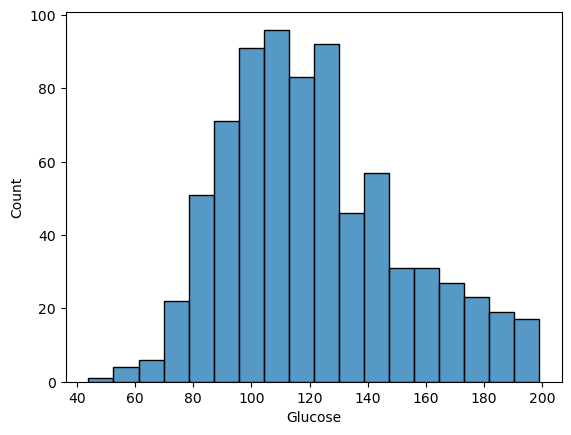

In [13]:
sns.histplot(df['Glucose'])

In [14]:
df['BloodPressure'].value_counts().head()

70.0    57
74.0    52
78.0    45
68.0    45
72.0    44
Name: BloodPressure, dtype: int64

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

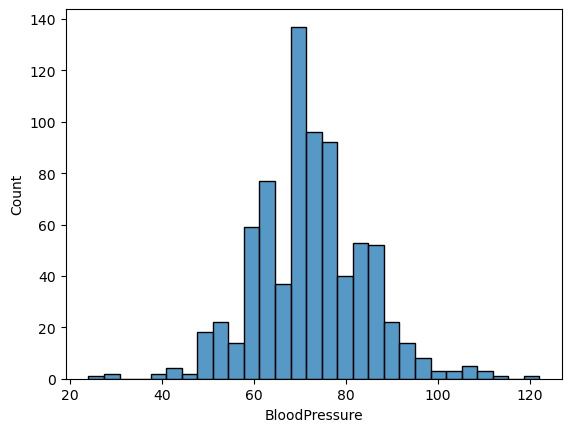

In [15]:
sns.histplot(df['BloodPressure'])

In [16]:
df['SkinThickness'].value_counts().head()

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
Name: SkinThickness, dtype: int64

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

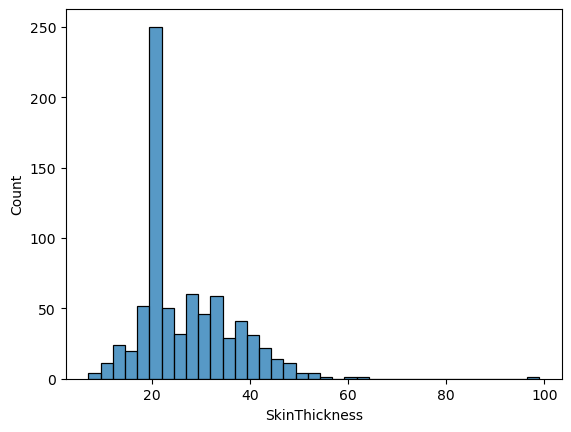

In [17]:
sns.histplot(df['SkinThickness'])

In [18]:
df['Insulin'].value_counts().head()

79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
Name: Insulin, dtype: int64

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

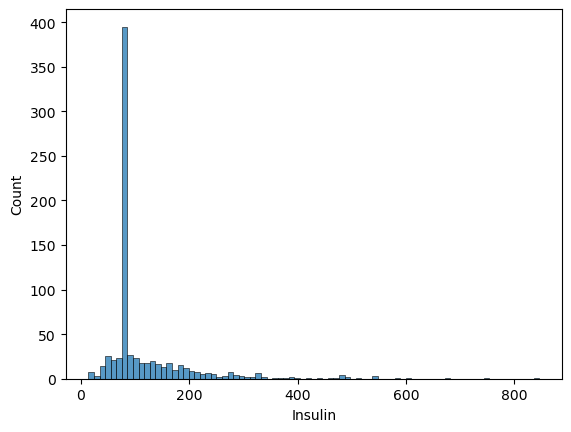

In [19]:
sns.histplot(df['Insulin'])

In [20]:
df['BMI'].value_counts().head()

32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
Name: BMI, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Count'>

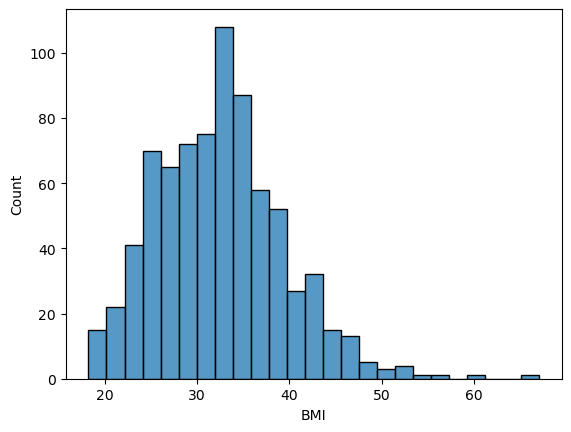

In [21]:
sns.histplot(df['BMI'])

In [22]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


### Data Exploration

In [24]:
positive = df[df['Outcome']==1]

In [25]:
positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.000000,30.5,0.158,53,1


In [26]:
positive.shape

(268, 9)

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

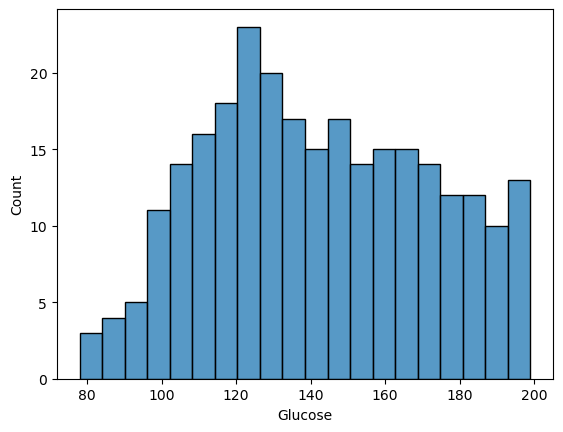

In [27]:
sns.histplot(positive['Glucose'], bins=20)

In [28]:
positive['Glucose'].value_counts().head()

125.0    7
128.0    6
129.0    6
115.0    6
158.0    6
Name: Glucose, dtype: int64

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

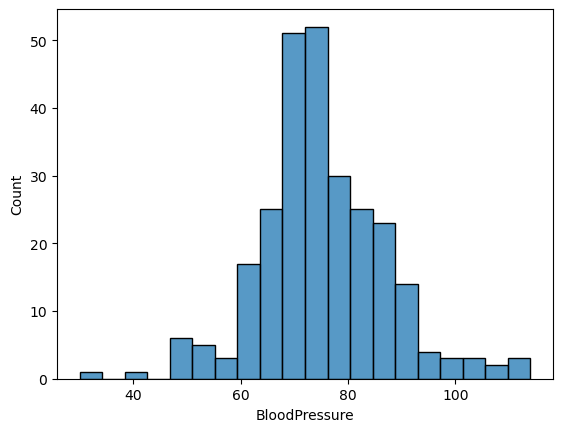

In [29]:
sns.histplot(positive['BloodPressure'], bins=20)

In [30]:
positive['BloodPressure'].value_counts().head()

70.0    23
76.0    18
78.0    17
74.0    17
72.0    16
Name: BloodPressure, dtype: int64

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

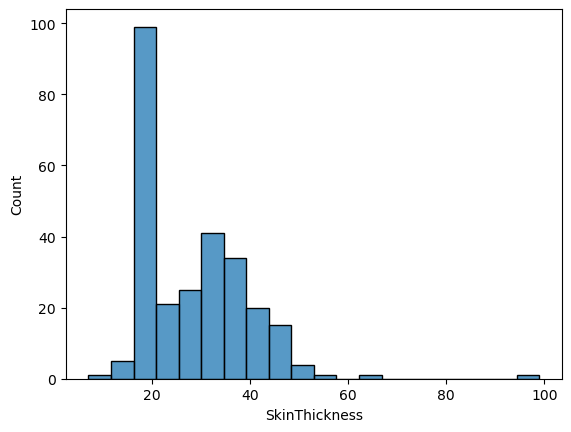

In [31]:
sns.histplot(positive['SkinThickness'], bins=20)

In [32]:
positive['SkinThickness'].value_counts().head()

20.536458    88
32.000000    14
30.000000     9
33.000000     9
39.000000     8
Name: SkinThickness, dtype: int64

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

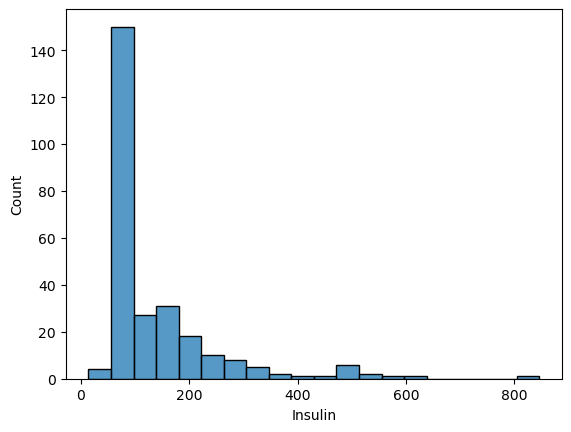

In [33]:
sns.histplot(positive['Insulin'], bins=20)

In [34]:
positive['Insulin'].value_counts().head()

79.799479     138
130.000000      6
180.000000      4
175.000000      3
156.000000      3
Name: Insulin, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Count'>

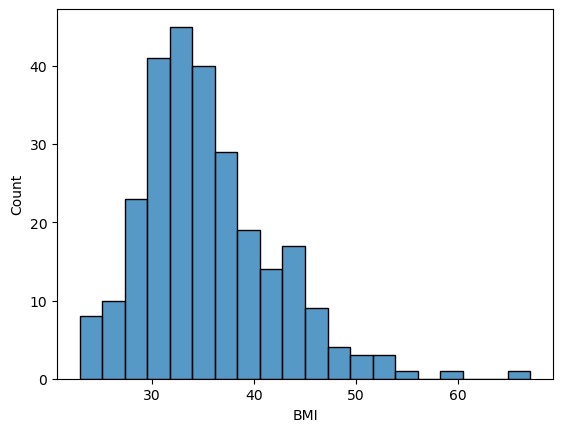

In [35]:
sns.histplot(positive['BMI'], bins=20)

In [36]:
positive['BMI'].value_counts().head()

32.9    8
31.6    7
33.3    6
31.2    5
30.5    5
Name: BMI, dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

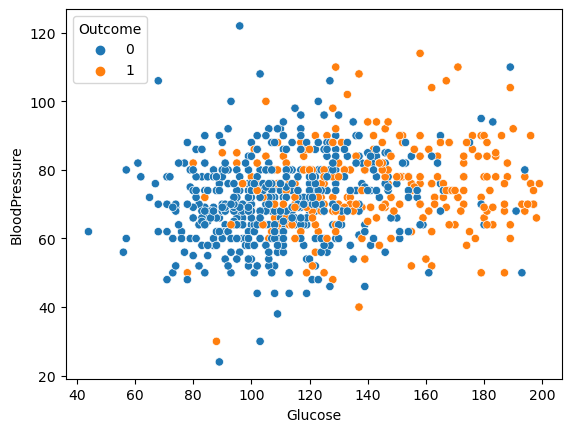

In [37]:
sns.scatterplot(x='Glucose',y='BloodPressure', hue='Outcome', data=df)

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

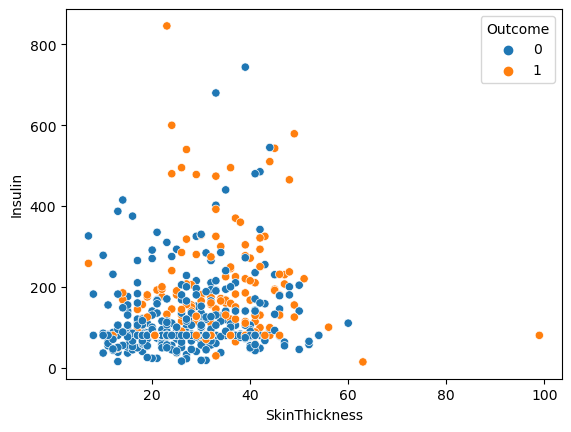

In [38]:
sns.scatterplot(x='SkinThickness',y='Insulin', hue='Outcome', data=df)

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

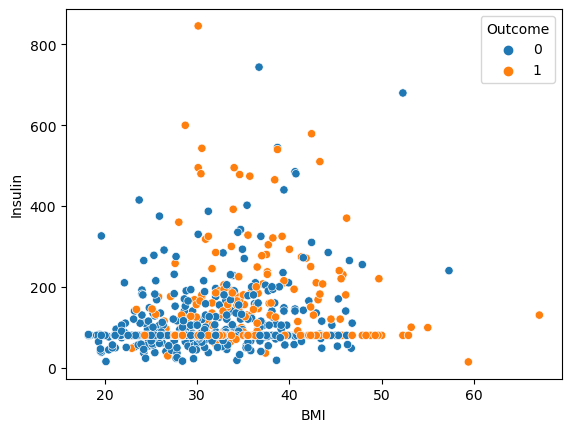

In [39]:
sns.scatterplot(x='BMI',y='Insulin', hue='Outcome', data=df)

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

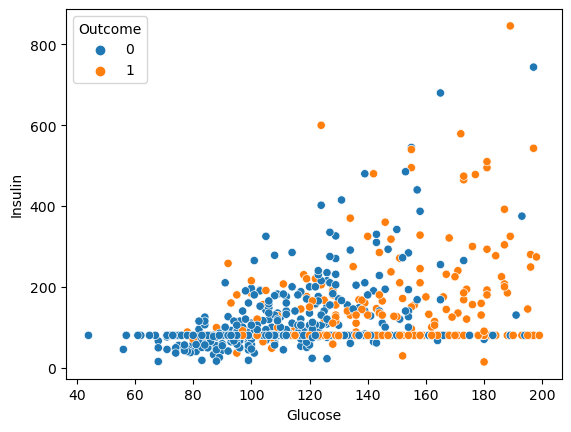

In [40]:
sns.scatterplot(x='Glucose',y='Insulin', hue='Outcome', data=df)

<AxesSubplot:xlabel='BloodPressure', ylabel='Insulin'>

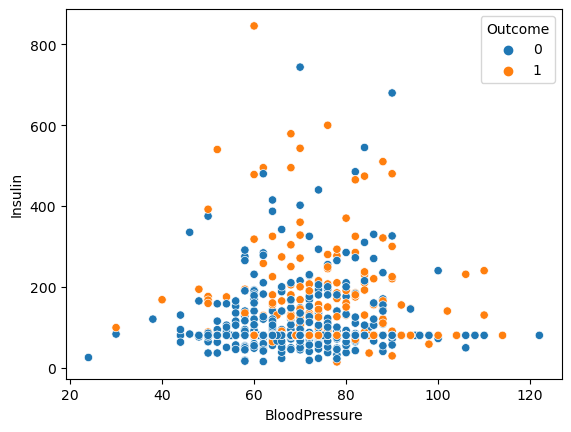

In [41]:
sns.scatterplot(x='BloodPressure',y='Insulin', hue='Outcome', data=df)

<AxesSubplot:>

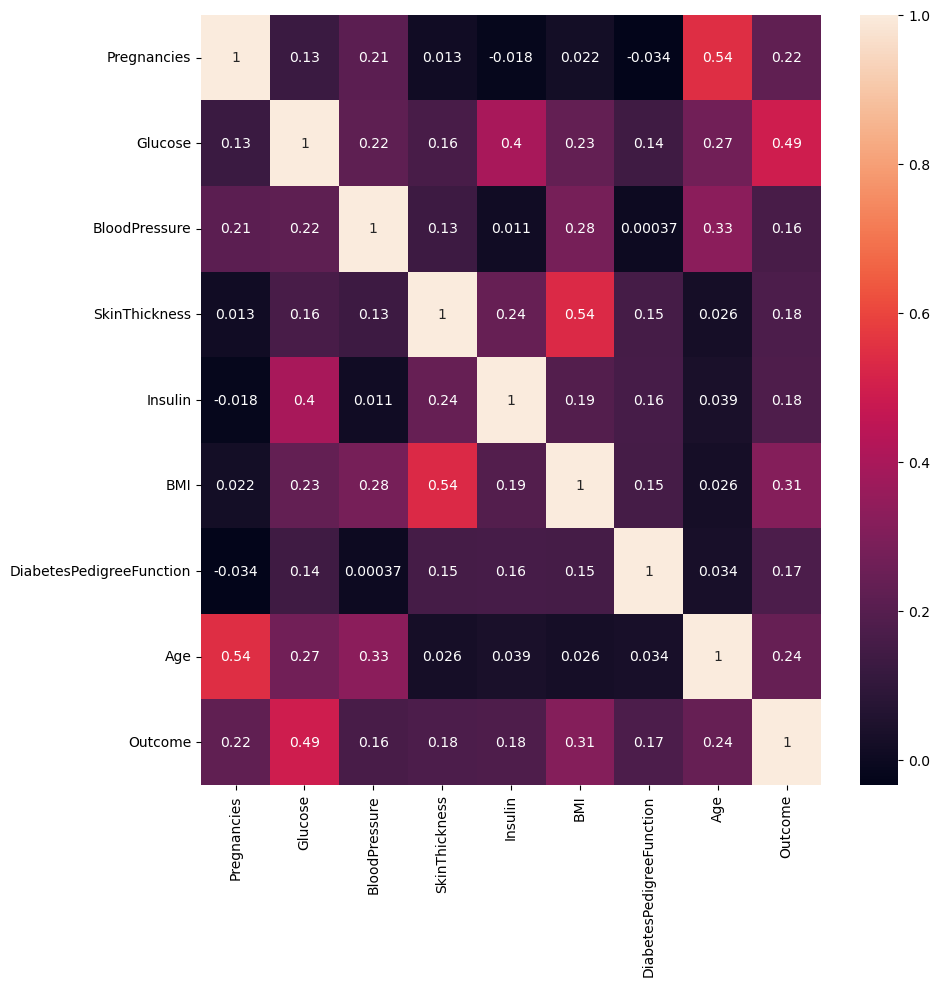

In [42]:
# Correlation Analysis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Model Making

In [43]:
from sklearn.model_selection import train_test_split

X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.15, random_state =10)


In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [45]:
model.fit(X_train,y_train).score(X_train, y_train)

0.7791411042944786

In [46]:
# Now fitting the model in test set
prediction= model.predict(X_test)

In [47]:
print(model.score(X_test,y_test))

0.7586206896551724


In [48]:
print(X_test.head(1))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
568            4    154.0           72.0           29.0    126.0  31.3   

     DiabetesPedigreeFunction  Age  
568                     0.338   37  


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,model.predict(X))
cm

array([[445,  55],
       [117, 151]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.56      0.64       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



In [51]:
#Applying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=5)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [52]:
model1.score(X_train,y_train)

0.8266871165644172

In [53]:
model1.score(X_test,y_test)

0.7758620689655172

In [54]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=10)
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [55]:
model2.score(X_train,y_train)

0.9892638036809815

In [56]:
model2.score(X_test,y_test)

0.7586206896551724

In [57]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5,
                             metric='minkowski',
                             p = 2)
model3.fit(X_train,y_train)

KNeighborsClassifier()

AUC: 0.866
True Positive Rate - [0.         0.17164179 0.43656716 0.65671642 0.88432836 0.98507463
 1.        ], False Positive Rate - [0.    0.006 0.042 0.142 0.298 0.588 1.   ] Thresholds - [2.  1.  0.8 0.6 0.4 0.2 0. ]


Text(0, 0.5, 'True Positive Rate')

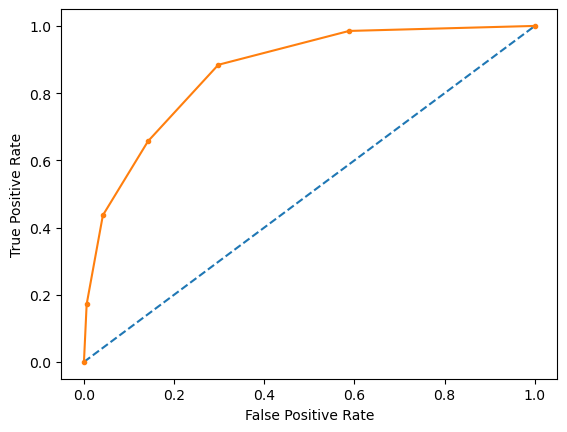

In [58]:
# ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predicting probabilities
probs = model3.predict_proba(X)

# keeping probabilities for the positive outcome only
probs = probs[:, 1]

# calculating AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

# calculating roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))

# ploting no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# ploting the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

f1=0.637 auc=0.712 ap=0.713


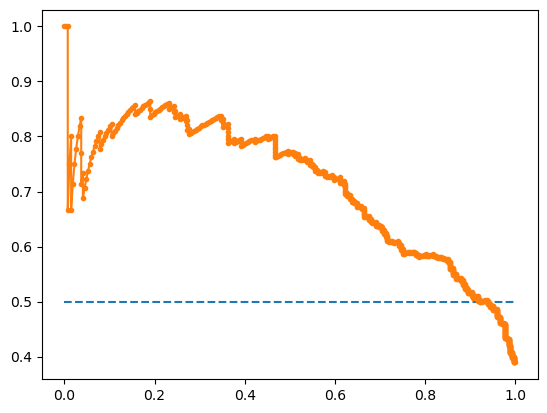

In [59]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# predicting probabilities
probs = model.predict_proba(X)

# keeping probabilities for the positive outcome only
probs = probs[:, 1]

# predicting class values
yhat = model.predict(X)

# calculating precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)

# calculating F1 score
f1 = f1_score(y, yhat)

# calculating precision-recall AUC
auc = auc(recall, precision)

# calculating average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plotting no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plotting the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.683 auc=0.787 ap=0.735


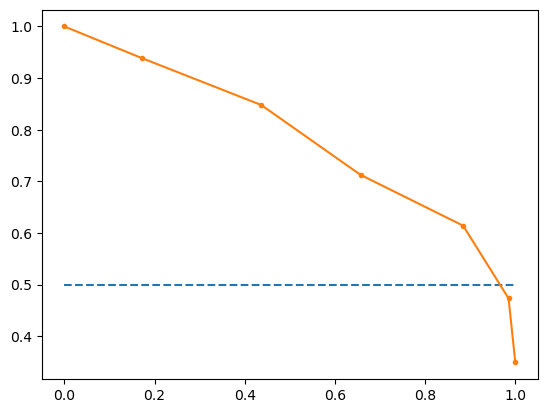

In [60]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# predicting probabilities
probs = model3.predict_proba(X)

# keeping probabilities for the positive outcome only
probs = probs[:, 1]

# predicting class values
yhat = model3.predict(X)

# calculating precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)

# calculating F1 score
f1 = f1_score(y, yhat)

# calculating precision-recall AUC
auc = auc(recall, precision)

# calculating average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plotting the precision-recall curve for the model
plt.plot(recall, precision, marker='.')